**Libraries, Data preparation and EDA**

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!pip install cleanlab
!pip install 'cleanlab[datalab]'
#from cleanlab.classification import CleanLearning
from cleanlab import Datalab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import spacy
from typing import Dict, List, Tuple, Union
import pandas as pd
import matplotlib.pyplot as plt
#import altair as alt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import silhouette_score, classification_report, accuracy_score,hamming_loss
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from numpy import argmax
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model

In [ ]:
#data1=pd.read_excel('/content/Child_DDS_sample.xlsx')
data2=pd.read_excel('/content/MIRAMAHARO_WDDS (version 1).xlsx')
#data3=pd.read_excel('/content/MVH_toilet_sample.xlsx')
#data4=pd.read_excel('/content/women_sda_sample_detail_table.xlsx')
data5=pd.read_excel('/content/DFSA_MAHARO_PARTICIPANTS.xlsx')
#data_=data[['silc_group_member', 'gfv_cg_group_member', 'other_group_member', 'ration_protection', 'millejours', 'voucher_agri', 'voucher_elevage', 'voucher_peche']]
#data_=data[['silc_group_member', 'gfv_cg_group_member', 'other_group_member', 'ration_protection', 'millejours', 'voucher_agri', 'voucher_elevage', 'voucher_peche', 'gfd']]

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   district                583 non-null    object 
 1   commune                 583 non-null    object 
 2   fokontany               583 non-null    object 
 3   code_menage             583 non-null    object 
 4   type_individus          583 non-null    object 
 5   sexe                    583 non-null    object 
 6   taille_menage           583 non-null    int64  
 7   age                     583 non-null    int64  
 8   2022-08-01 00:00:00     543 non-null    float64
 9   2022-09-01 00:00:00     536 non-null    float64
 10  2022-10-01 00:00:00     521 non-null    float64
 11  2022-11-01 00:00:00     523 non-null    float64
 12  2022-12-01 00:00:00     531 non-null    float64
 13  2023-01-01 00:00:00     548 non-null    float64
 14  2023-02-01 00:00:00     435 non-null    fl

In [ ]:
data2['LAST SCORE']

0      7
1      3
2      2
3      5
4      6
      ..
578    3
579    3
580    2
581    1
582    3
Name: LAST SCORE, Length: 583, dtype: int64

In [ ]:
data5.columns

Index(['district', 'commune', 'fokontany', 'code_menage', 'type_individus',
       'sexe', 'age', 'SILC', 'groupe_elevage', 'groupe_agriculture',
       'groupe_peche', 'literacy', 'MVH', 'vouchers_all', 'voucher_elevage',
       'voucher_peche', 'voucher_agri', 'dist_GFD', 'dist_ration_protection',
       'dist_1000Jours'],
      dtype='object')

In [ ]:
data5['sexe'].unique()

array(['femme', 'homme'], dtype=object)

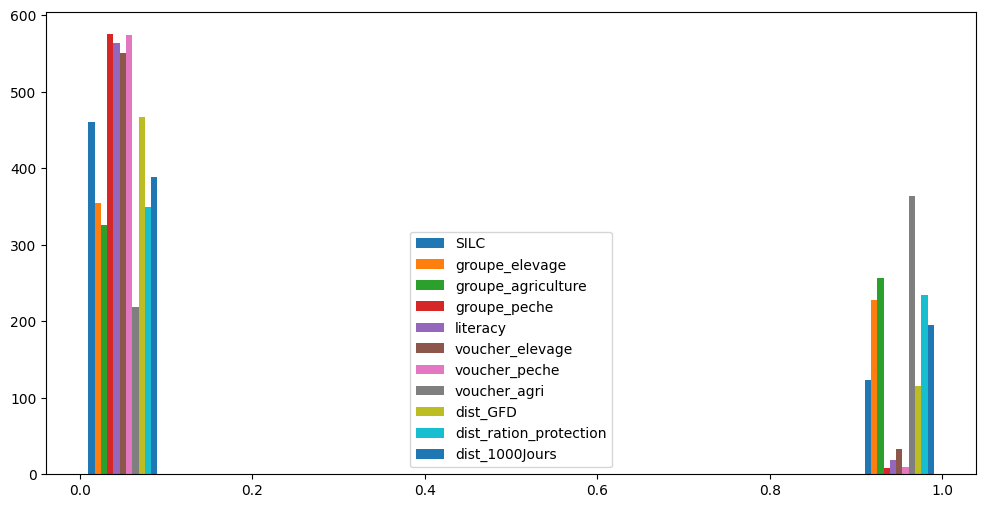

In [ ]:
plt.figure(figsize=(12,6))
plt.hist([data2['SILC'], data2['groupe_elevage'], data2['groupe_agriculture'], data2['groupe_peche'], data2['literacy'], data2['voucher_elevage'], data2['voucher_peche'], data2['voucher_agri'], data2['dist_GFD'], data2['dist_ration_protection'], data2['dist_1000Jours']], label=['SILC', 'groupe_elevage', 'groupe_agriculture',
       'groupe_peche', 'literacy', 'voucher_elevage',
       'voucher_peche', 'voucher_agri', 'dist_GFD', 'dist_ration_protection',
       'dist_1000Jours'])
plt.legend()
plt.show()

In [ ]:
for i in range(len(data2)):
  if data2.loc[i, 'LAST SCORE']<=3:
    data2.loc[i, 'CATEGORIES']='Low'
  elif data2.loc[i, 'LAST SCORE']>3 and data2.loc[i, 'LAST SCORE']<=5:
    data2.loc[i, 'CATEGORIES']='Medium'
  else:
    data2.loc[i, 'CATEGORIES']='High'

<ipython-input-13-c9a9d3e7d83f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['LAST SCORE'])


<Axes: xlabel='LAST SCORE', ylabel='Density'>

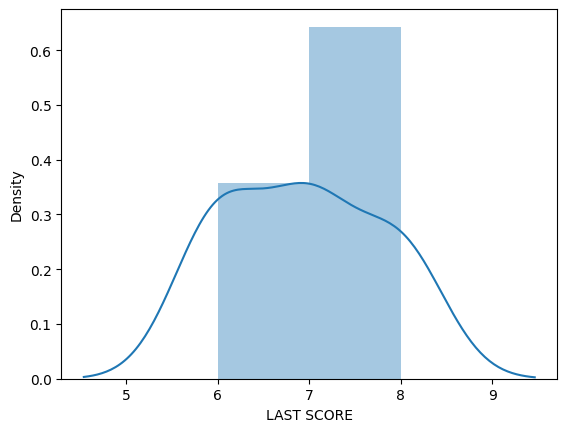

In [ ]:
d=data2[data2['CATEGORIES']=='High']
sns.distplot(d['LAST SCORE'])

In [ ]:
#data2=data2[data2['MVH']==1].reset_index().drop('index', axis=1)

In [ ]:
data5['sexe'].replace(['femme', 'homme'], [1,0], inplace=True)
data2['sexe'].replace(['femme', 'homme'], [1,0], inplace=True)
data_=data5[['sexe', 'age', 'SILC', 'groupe_elevage', 'groupe_agriculture',
       'groupe_peche', 'literacy', 'voucher_elevage',
       'voucher_peche', 'voucher_agri', 'dist_GFD', 'dist_ration_protection',
       'dist_1000Jours']]
X=data2[['SILC', 'groupe_elevage', 'groupe_agriculture',
       'groupe_peche', 'literacy', 'voucher_elevage',
       'voucher_peche', 'voucher_agri', 'dist_GFD', 'dist_ration_protection',
       'dist_1000Jours']]#.rename(columns={'age_chef_menage':'age'})

#X_=data2[['sexe', 'nbr_bovin', 'type_menage', 'activite_principale', 'SILC', 'groupe_elevage', 'groupe_agriculture',
       #'groupe_peche', 'literacy', 'voucher_elevage',
       #'voucher_peche', 'voucher_agri', 'dist_GFD', 'dist_ration_protection',
       #'dist_1000Jours']].rename(columns={'age_chef_menage':'age'})
Y=data2['CATEGORIES']
data2['CATEGORIES_']=data2['CATEGORIES'].replace(['Low', 'Medium', 'High'], [0,1,2])
Y_=data2['CATEGORIES_']

In [ ]:
Y_.value_counts()

0    465
1    104
2     14
Name: CATEGORIES_, dtype: int64

In [ ]:
#sns.distplot(data2['age_chef_menage'])
#X_.to_csv('feat.csv', index=False)

In [ ]:
X_=X.replace([0,1], ['no', 'yes'])

In [ ]:
scaler=StandardScaler()
X['age']=scaler.fit_transform(X[['age']])
#X_=pd.get_dummies(X_, columns=['type_menage', 'activite_principale', 'nbr_bovin'])
#X=pd.get_dummies(X, columns=['nbr_bovin'])

In [ ]:
#help(TSNE)
# for distnace https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html

In [ ]:
tsne = TSNE(n_components=2, random_state=7, metric='jaccard', perplexity=10)

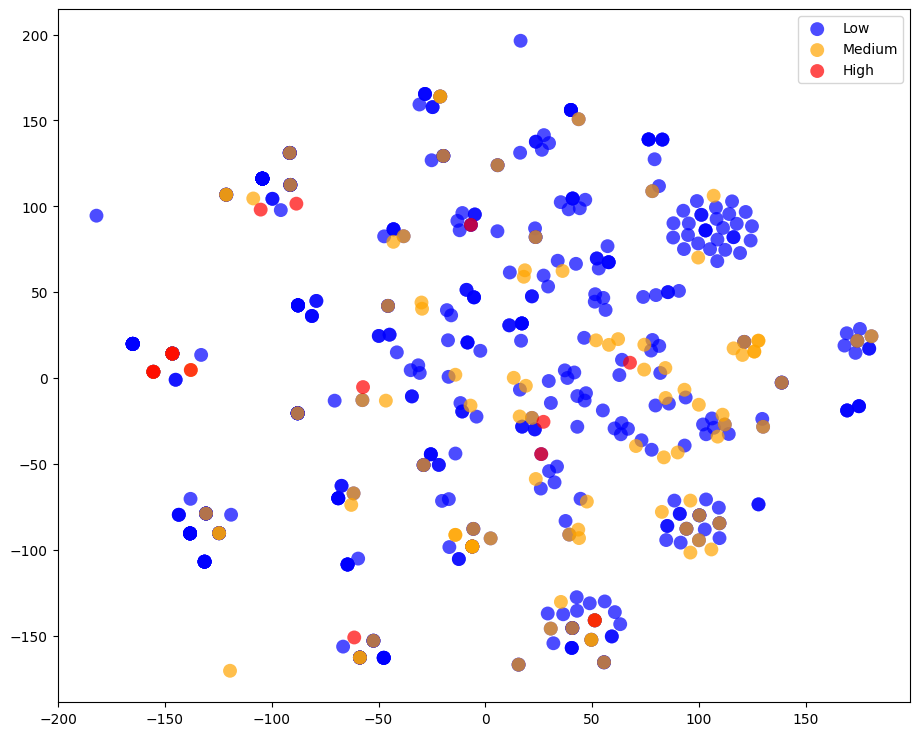

In [ ]:
embeddings_2d = tsne.fit_transform(X)
figure = plt.figure(figsize=(11, 9))
ax = figure.add_subplot(111)
i = 0
for color in ['blue', 'orange', 'red']:
    ax.scatter(embeddings_2d[data2['CATEGORIES_'] == i][:,0], embeddings_2d[data2['CATEGORIES_'] == i][:,1], c=color, s=100, alpha=0.7, edgecolors='none')
    ax.legend(['Low', 'Medium', 'High'])
    i+=1

In [ ]:
#X_=pd.read_csv('/content/feta.csv')
#X_

Lowest dietary diversity :  (≤ 3 food groups)
 Medium dietary diversity : (4 and 5 food groups)
High dietary diversity : (≥ 6 food groups)

In [ ]:
#for i in range(len(df_t)):
  #if df_t.loc[i, 'sda']<=3:
    #df_t.loc[i, 'class']='Low'
  #elif df_t.loc[i, 'sda'] in [4,5]:
   # df_t.loc[i, 'class']='Medium'
  #if df_t.loc[i, 'sda']>=6:
   # df_t.loc[i, 'class']='High'

In [ ]:
#X=df_t.drop(['code_menage', 'q56all', 'q57all', 'child_sda', 'location', 'cluster'], axis=1)
#X=df_t.drop(['gps_village', 'code_individus', 'toilet'], axis=1)

#Y=df_t[['class']].replace(['Low', 'Medium', 'High'], [0,1,2])
#Y=pd.read_csv('/content/lab_child.csv')
#Y=df_t[['child_sda']]

In [ ]:
#X[X.duplicated()]

**Confident Learning**

In [ ]:
#logr_clf = LogisticRegressionCV(random_state=42, max_iter=1000)
gb_clf = GradientBoostingClassifier(random_state=42)
#adb_clf = AdaBoostClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
#dt_clf = DecisionTreeClassifier(random_state=42)
#svm_clf = SVC(probability=True, random_state=42)
vot_clf = VotingClassifier(estimators=[('gb', gb_clf), ('rf', rf_clf)], voting='soft')

Cleanlab

In [ ]:
cl_=CleanLearning(vot_clf)

In [ ]:
Y.unique()

array(['Acceptable', 'Poor', 'Borderline'], dtype=object)

In [ ]:
Y_c=Y.replace(['Acceptable', 'Borderline', 'Poor'], [0,1,2])

In [ ]:
issues_all = cl_.find_label_issues(X, labels=Y_c.to_numpy().ravel())

In [ ]:
issues_all[issues_all['is_label_issue']==True]['given_label'].value_counts()

2    179
0     91
1     29
Name: given_label, dtype: int64

In [ ]:
issues_all

,is_label_issue,label_quality,given_label,predicted_label
0,False,0.441034,0,0
1,False,0.517289,0,0
2,True,0.345006,2,0
3,False,0.490659,0,0
4,False,0.423396,0,0
...,...,...,...,...
892,True,0.303437,2,0
893,True,0.326295,2,0
894,False,0.468997,2,2
895,True,0.338969,2,0


In [ ]:
rk=issues_all[issues_all['is_label_issue']==True].index.tolist()

In [ ]:
Y_c=Y_c.reset_index().drop('index', axis=1)

In [ ]:
for i in rk:
  Y_c.loc[i]=issues_all.loc[i, 'predicted_label']

In [ ]:
#rk
for i in rk:
  Y_c.loc[i, 'child_sda']=issues_all.loc[i, 'predicted_label']

In [ ]:
y_testc.loc[7, 'fcs']=2
y_testc.loc[19, 'fcs']=2
y_testc.loc[23, 'fcs']=2
#y_testc

In [ ]:
for i in rk:
  if Y.loc[i, 'toilet']==1:
    Y.loc[i, 'toilet']=0
  elif Y.loc[i, 'toilet']==0:
    Y.loc[i, 'toilet']=1

Datalab

In [ ]:
clf=vot_clf
labels=Y_

In [ ]:
num_crossval_folds = 5
pred_probs = cross_val_predict(clf, X, labels, cv=num_crossval_folds, method='predict_proba',)

In [ ]:
#from cleanlab import Datalab

In [ ]:
data=pd.concat([X, data2[['CATEGORIES_']]], axis=1)
lab = Datalab(data, label_name="CATEGORIES_")
lab.find_issues(pred_probs=pred_probs, features=X.values)

Finding label issues ...
Finding outlier issues ...
Fitting OOD estimator based on provided features ...
Finding near_duplicate issues ...
Audit complete. 569 issues found in the dataset.


In [ ]:
lab.report()

Here is a summary of the different kinds of issues found in the data:

    issue_type  num_issues
         label         468
       outlier         101
near_duplicate           0

Dataset Information: num_examples: 897, num_classes: 3


----------------------- label issues -----------------------

About this issue:
	Examples whose given label is estimated to be potentially incorrect
    (e.g. due to annotation error) are flagged as having label issues.
    

Number of examples with this issue: 468
Overall dataset quality in terms of this issue: 0.3099

Examples representing most severe instances of this issue:
     is_label_issue  label_score  given_label  predicted_label
699            True     0.019378            1                2
680            True     0.020084            0                2
57             True     0.022855            2                1
44             True     0.029106            2                1
527            True     0.031171            1                2


--

In [ ]:
lab.get_issue_summary()

,issue_type,score,num_issues
0,label,0.309922,468
1,outlier,0.959577,101
2,near_duplicate,0.024866,0


In [ ]:
print(len(Y))
print(len(X))
print(len(data2))
print(len(data))

897
897
897
897


In [ ]:
issues_all = lab.get_issues("label")
rk=issues_all[issues_all['is_label_issue']==True].index.tolist()
for i in rk:
  data.loc[i, 'CATEGORIES_']=issues_all.loc[i, 'predicted_label']
Y=data['CATEGORIES_']

In [ ]:
issues_all = lab.get_issues("near_duplicate")
rk=issues_all[issues_all['is_near_duplicate_issue']==True].index.tolist()
data=data.loc[set(data.index.tolist())-set(rk)]
X=data.drop('CATEGORIES_', axis=1)
Y=data['CATEGORIES_']

<ipython-input-25-8e4f1946ba7e>:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data=data.loc[set(data.index.tolist())-set(rk)]


In [ ]:
issues_all = lab.get_issues("outlier")
rk=issues_all[issues_all['is_outlier_issue']==True].index.tolist()
data=data.loc[set(data.index.tolist())-set(rk)]
X=data.drop('CATEGORIES_', axis=1)
Y=data['CATEGORIES_']

<ipython-input-26-be4b77f8c9ab>:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data=data.loc[set(data.index.tolist())-set(rk)]


In [ ]:
# Find label issues in the train data
#my_train_pred_probs = vot_clf .predict_proba(X_res)
#my_train_preds = my_train_pred_probs.argmax(axis=1)  # predicted labels

#issues_train = CleanLearning(vot_clf ).find_label_issues(X_res, labels=y_res.to_numpy().ravel())
#y_trainc=y_res.reset_index().drop('index', axis=1)

#rk=issues_train[issues_train['is_label_issue']==True].index.tolist()
#for i in rk:
#  if y_trainc.loc[i, 'toilet']==1:
#    y_trainc.loc[i, 'toilet']=0
#  elif y_trainc.loc[i, 'toilet']==0:
#    y_trainc.loc[i, 'toilet']=1

In [ ]:
# You should inspect issues_test and fix issues to ensure high-quality test data labels.
#_testc=y_test.reset_index().drop('index', axis=1)

#rk=issues_test[issues_test['is_label_issue']==True].index.tolist()
#for i in rk:
  #if y_testc.loc[i, 'toilet']==1:
    #y_testc.loc[i, 'toilet']=0
  #elif y_testc.loc[i, 'toilet']==0:
    #y_testc.loc[i, 'toilet']=1

#corrected_test_labels = y_testc  # Here we'll pretend you have done this perfectly :)df_t['toilet'].iloc[ranked_label_issues].replace([0, 1], [1,0])

# Fit more robust version of model on noisily labeled training data
cl = cl_.fit(X_train.to_numpy(), y_train.to_numpy().ravel())
cl_test_preds = cl.predict(X_test.to_numpy())
cl_test_pred_t = cl.predict(X_train.to_numpy())
print(classification_report(y_testc, cl_test_preds))

Predictive Model

In [ ]:
#Yc=df_t[['sda']]

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, shuffle=True, stratify=Y, random_state=123)
X_train, X_cal, y_train, y_cal=train_test_split(X_train, y_train, test_size=0.1, shuffle=True, stratify=y_train, random_state=123)
#from imblearn.over_sampling import SMOTE
#from sklearn.utils import resample
#X_up=pd.concat([X_train, y_train], axis=1)
#sm = SMOTE(sampling_strategy='all', random_state=42)
#X_min_ = X_up[(X_up['RiskLevel']==0)]
#X_min = X_up[(X_up['RiskLevel']==1)]
#X_max = X_up[(X_up['RiskLevel']==1)]
#X_min=resample(X_min, replace=True, n_samples= 50, random_state=42)
#X_min_=resample(X_min_, replace=True, n_samples= 50, random_state=42)
#X=pd.concat([X_min, X_min_, X_max])
#X_train, X_test, y_train_, y_test_=train_test_split(X.drop('RiskLevel', axis=1), X[['RiskLevel']], test_size=.20, random_state=42)
#X_res, y_res = sm.fit_resample(X_train, y_train)
#X_train, X_test=train_test_split(X, test_size=0.2, shuffle=True, random_state=123)
#X_train, X_test, Y_train, Y_test=iterative_train_test_split(X, Y, test_size=0.2)

In [ ]:
#tsne = TSNE(n_components=2, random_state=7, perplexity=15)
#embeddings_2d = tsne.fit_transform(X.values)

In [ ]:
#Y.to_csv('lab_.csv', index=False)
y_cal.value_counts()

0    22
1    21
2    13
Name: CATEGORIES_, dtype: int64

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)
logr_clf = LogisticRegressionCV(random_state=42, max_iter=1000)
gb_clf = GradientBoostingClassifier(random_state=42)
adb_clf = AdaBoostClassifier(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)


for name, model in zip(['Random Forest', 'SVM', 'Logistic Regression', 'Gradient Boost', 'AdaBoost', 'Decision Tree'],
                       [rf_clf, svm_clf, logr_clf, gb_clf, adb_clf,dt_clf]):
    print('\t',name.upper(),':')
    model.fit(X, Y.values.ravel())
    #model.fit(X_res, y_res)
    #model.fit(X, Y.values.ravel())
    #y_pred = model.predict(X)
    y_pred = model.predict(X)
    #y_pred_t = model.predict(X_train)
    #y_pred_t = model.predict(X_res)
    #print('Accuracy: ', accuracy_score(y_train, y_pred_t))
    #print(classification_report(y_train, y_pred_t))
    #print('Accuracy: ', accuracy_score(y_res, y_pred_t))
    print(classification_report(Y, y_pred))

	 RANDOM FOREST :
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       318
           1       0.70      0.85      0.77       291
           2       0.70      0.61      0.65       187

    accuracy                           0.76       796
   macro avg       0.76      0.75      0.75       796
weighted avg       0.77      0.76      0.76       796

	 SVM :
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       318
           1       0.69      0.83      0.75       291
           2       0.71      0.53      0.61       187

    accuracy                           0.74       796
   macro avg       0.74      0.72      0.72       796
weighted avg       0.75      0.74      0.74       796

	 LOGISTIC REGRESSION :
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       318
           1       0.61      0.73      0.66       291
           2       0.57  

In [ ]:
vot_clf = VotingClassifier(estimators=[('svm', svm_clf), ('gb', gb_clf)], voting='soft')
vot_clf.fit(X, Y.values.ravel())
#vot_clf.fit(X_res, y_res.values.ravel())
y_pred = vot_clf.predict(X)
#y_pred_t = vot_clf.predict(X_train)
#print('Accuracy: ', accuracy_score(y_train, y_pred_t))
#print('Accuracy: ', accuracy_score(y_train, y_pred_t))
#print(classification_report(y_train, y_pred_t))
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       318
           1       0.69      0.84      0.75       291
           2       0.72      0.54      0.62       187

    accuracy                           0.75       796
   macro avg       0.74      0.72      0.73       796
weighted avg       0.75      0.75      0.74       796



Prediction in a Factorial plan

In [ ]:
pip install prince

In [ ]:
#import prince
help(prince.MCA)

In [ ]:
#help(prince.FAMD)
famd = prince.MCA(n_components=11, n_iter=3,
                   copy=True, check_input=True,
                   engine='sklearn',random_state=42)

data__=famd.fit(X_)
data_t = famd.fit_transform(X_)
data__. cumulative_percentage_of_variance_

array([ 21.5704197 ,  34.25430606,  45.71451134,  56.29267783,
        65.17969635,  73.49057473,  80.19088252,  86.53616325,
        92.18603781,  97.41192122, 100.        ])

In [ ]:
X.columns

Index(['SILC', 'groupe_elevage', 'groupe_agriculture', 'groupe_peche',
       'literacy', 'voucher_elevage', 'voucher_peche', 'voucher_agri',
       'dist_GFD', 'dist_ration_protection', 'dist_1000Jours'],
      dtype='object')

In [ ]:
data_=data_.drop(['sexe', 'age'], axis=1)

In [ ]:
#data_['preds']=vot_clf.predict(data_.drop(['95% IC0', '95% IC1'], axis=1))
data_['preds']=vot_clf.predict(data_)
#data_['preds'].replace([0,1,2], ['Pauvre', 'Limite', 'Acceptable'], inplace=True)

In [ ]:
#X_=df_t.drop(['code_menage', 'q56all', 'q57all', 'child_sda'], axis=1).replace([0,1], ['No', 'Yes'])
#X_[['number_of_food_group_consumed']]=df_t[['number_of_food_group_consumed']]
#X_.to_csv('dds.csv', index=False)
#X_
#X.shape
#X_=pd.read_csv('/content/cds.csv')
X_.replace(['No', 'Yes'], [0,1], inplace=True)

In [ ]:
X_['clust'].unique()

array([1, 3, 5, 4, 2])

In [ ]:
X_[X_['clust']==5]['number_of_food_group_consumed'].min()

2

In [ ]:
data_.to_csv('predictions_fcs.csv', index=False)

Model Interpretation

In [ ]:
#pip install shap
import shap

In [ ]:
#X_train_summary = shap.kmeans(X_train, 10)

In [ ]:
#numeric_features = ['total_notes_int','hh_size','hh_age']
#numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

#categorical_features_ = ['commune', 'district', 'fokontany', 'village']
#categorical_transformer_ = Pipeline(steps=[('dum_', ce.CountEncoder())])

#categorical_features = ['hh_sex', 'region']
#categorical_transformer = Pipeline(steps=[('dum', ce.OneHotEncoder())])

#preprocessor = ColumnTransformer(
    #transformers=[
        #('num', MinMaxScaler(), ['total_notes_int','hh_size','hh_age']),
        #('cat', ce.OneHotEncoder(), ['commune', 'district', 'fokontany', 'village']),
        #('cat_', ce.CountEncoder(), ['commune', 'district', 'fokontany', 'village'])])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.

In [ ]:
#clf=Pipeline(steps=[('pros', preprocessor),
                    #('classifier', RandomForestClassifier())])

In [ ]:
#clf

In [ ]:
#rf_clf.feature_importances_

In [ ]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=123)
#clf.fit(X_train, Y_train)
# load JS vis in the notebook
#shap.initjs()

In [ ]:
model = fit_xgboost(X, Y)

In [ ]:
import xgboost
def fit_xgboost(X, y):
    """ Train an XGBoost model with early stopping.
    """
    X_train,X_test,y_train,y_test = train_test_split(X, Y)
    dtrain = xgboost.DMatrix(X_train, label=y_train)
    dtest = xgboost.DMatrix(X_test, label=y_test)
    model = xgboost.train(
        { "eta": 0.0001, "subsample": 0.5, "max_depth": 2, "objective": "binary:logistic"}, dtrain, num_boost_round=200000,
        evals=((dtest, "test"),), early_stopping_rounds=20, verbose_eval=True
    )
    return model

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
No/low signal found from feature 1 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
No/low signal found from feature 5 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
No/low signal found from feature 7 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).


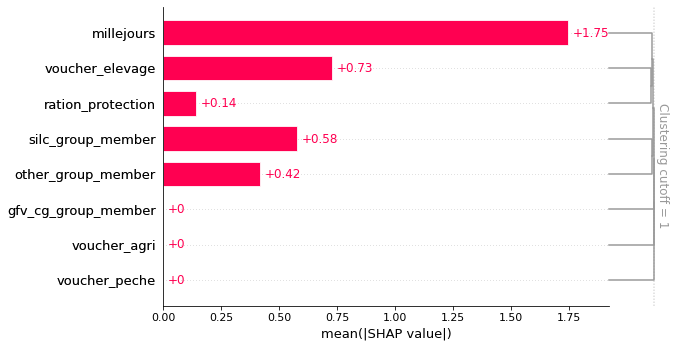

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

clust = shap.utils.hclust(X, Y, linkage="single")
shap.plots.bar(shap_values, clustering=clust, clustering_cutoff=1)

In [ ]:
#rf_clf.predict_proba(X_train)[0]
X_train_summary = shap.kmeans(X_train, 10)
#X_train_summary = pd.DataFrame.sample(X_train, frac=50/len(X_train))

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [ ]:
#import random
#random.sample(X_train, 50)
X_train_summary

In [ ]:
#help(shap.  KernelExplainer)

In [ ]:
# initiate explainer with pipeline function
#explainer = shap.KernelExplainer(binary_rel_clf.predict_proba, X_train)
explainer = shap.KernelExplainer(vot_clf.predict_proba,\
                                          X_train_summary)
#shap_svm_values_test = explainer.shap_values(X_test, nsamples=200, l1_reg="num_features(8)")
shap_svm_values_test = explainer.shap_values(X_test)

In [ ]:
help(shap.utils.hclust)

Help on function hclust in module shap.utils._clustering:

hclust(X, y=None, linkage='single', metric='auto', random_state=0)



In [ ]:
#clust = shap.utils.hclust(X, Y_c, linkage="single")
shap.plots.bar(shap_svm_values_test, clustering=clust, clustering_cutoff=1)

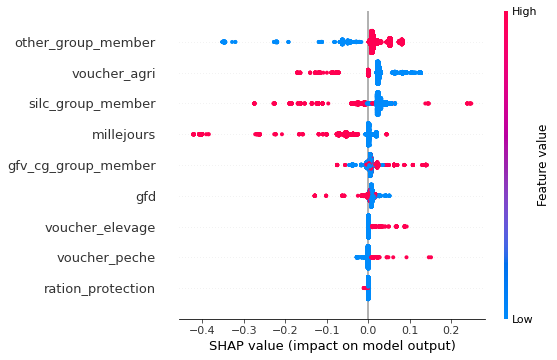

In [ ]:
shap.summary_plot(shap_svm_values_test[1], data_, plot_type="dot")

In [ ]:
X[['silc_group_member', 'gfv_cg_group_member', 'other_group_member']]

,silc_group_member,gfv_cg_group_member,other_group_member
0,1,0,1
1,0,1,1
2,1,1,1
3,0,1,1
4,0,0,1
...,...,...,...
201,0,1,1
202,0,0,0
203,0,0,1
204,1,0,1


In [ ]:
df=data_
#df
from scipy.stats import chi2_contingency

In [ ]:
df_=pd.DataFrame()
for i in df.columns.tolist():
  L=df.columns.tolist()
  L.remove(i)
  for j in L:
    data_interim=df[[i, j]]
    data_cont=pd.crosstab(data_interim[i], data_interim[j])
    df_.loc[i,j]=chi2_contingency(data_cont)[1]

**Causal Inference**

In [ ]:
#!pip install causallib
#!pip install econml
#!pip install dowhy
#from causallib.estimation import IPW, Matching, overlap_weights
#from causallib.evaluation import evaluate
#from causallib.estimation import Standardization
#from causallib.estimation import StratifiedStandardization
# DoWhy imports
import dowhy
from dowhy import CausalModel

# EconML imports
from econml.iv.dr import LinearIntentToTreatDRIV
from econml.cate_interpreter import SingleTreeCateInterpreter, SingleTreePolicyInterpreter
from econml.dml import LinearDML, DML, SparseLinearDML, CausalForestDML, NonParamDML
from econml.dr import ForestDRLearner, LinearDRLearner, DRLearner, SparseLinearDRLearner

Double Machine Learning Approach

In [ ]:
sns.distplot(data2['nbr_petit_ruminant'])

In [ ]:
sns.distplot(data2['nbr_volaille'])

In [ ]:
#sns.distplot(data2['nbr_bovin'])
data2['activite_principale'].unique()

array(['agriculture_pluviale', 'agriculture_irriguee_decrue', 'elevage',
       'peche', 'commerce', 'salaire_occasionnel', 'fonctionnaire',
       'artisan', 'chomeur_cherche_de_travail', 'medecin_traditionel',
       'fram', 'employe_permanent', 'travailleur_journalier'],
      dtype=object)

In [ ]:
X=data2[['sexe', 'household_size', 'age_chef_menage', 'type_menage', 'activite_principale', 'nbr_volaille', 'nbr_bovin',
         'nbr_petit_ruminant',
         'SILC', 'groupe_elevage',
         'groupe_agriculture',
       'groupe_peche', 'literacy', 'voucher_elevage',
       'voucher_peche', 'voucher_agri', 'dist_GFD', 'dist_ration_protection',
       'dist_1000Jours']]
X=pd.get_dummies(X, columns=['type_menage', 'activite_principale', 'nbr_bovin'])

In [ ]:
#X.columns

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, data2[['CATEGORIES_']], test_size=0.1, shuffle=True, stratify=data2[['CATEGORIES_']], random_state=123)

In [ ]:
T=X_train[['SILC', 'groupe_elevage', 'groupe_agriculture', 'groupe_peche', 'literacy', 'voucher_elevage', 'voucher_peche', 'voucher_agri', 'dist_GFD', 'dist_ration_protection', 'dist_1000Jours']].values
W=X_train[['household_size', 'activite_principale_agriculture_irriguee_decrue',
       'activite_principale_agriculture_pluviale',
       'activite_principale_artisan',
       'activite_principale_chomeur_cherche_de_travail',
       'activite_principale_commerce', 'activite_principale_elevage',
       'activite_principale_employe_permanent',
       'activite_principale_fonctionnaire', 'activite_principale_fram',
       'activite_principale_medecin_traditionel', 'activite_principale_peche',
       'activite_principale_salaire_occasionnel',
       'activite_principale_travailleur_journalier', 'nbr_bovin_0',
       'nbr_bovin_0_a_5', 'nbr_bovin_11_a_20', 'nbr_bovin_1_a_5',
       'nbr_bovin_6_a_10', 'nbr_bovin_plus_de_20', 'nbr_volaille', 'nbr_petit_ruminant']].values
X_c=X_train[['sexe', 'age_chef_menage', 'type_menage_CNA-Menage enfant', 'type_menage_FNM - Menage femme',
       'type_menage_MF-Menage couple', 'type_menage_MNF-Menage homme']].values
Y=y_train.values

In [ ]:
confounder_names=['household_size', 'activite_principale_agriculture_irriguee_decrue',
       'activite_principale_agriculture_pluviale',
       'activite_principale_artisan',
       'activite_principale_chomeur_cherche_de_travail',
       'activite_principale_commerce', 'activite_principale_elevage',
       'activite_principale_employe_permanent',
       'activite_principale_fonctionnaire', 'activite_principale_fram',
       'activite_principale_medecin_traditionel', 'activite_principale_peche',
       'activite_principale_salaire_occasionnel',
       'activite_principale_travailleur_journalier', 'nbr_bovin_0',
       'nbr_bovin_0_a_5', 'nbr_bovin_11_a_20', 'nbr_bovin_1_a_5',
       'nbr_bovin_6_a_10', 'nbr_bovin_plus_de_20', 'nbr_volaille', 'nbr_petit_ruminant']
feature_names=['sexe', 'age_chef_menage', 'type_menage_CNA-Menage enfant', 'type_menage_FNM - Menage femme',
       'type_menage_MF-Menage couple', 'type_menage_MNF-Menage homme']

In [ ]:
X_=X[['silc_group_member', 'gfv_cg_group_member', 'other_group_member']]
X__=X[['silc_group_member', 'gfv_cg_group_member', 'other_group_member', 'millejours', 'voucher_agri', 'voucher_elevage', 'voucher_peche']]
Xc_train=X_train[['silc_group_member', 'gfv_cg_group_member', 'other_group_member']]
Xc_train_=X_train[['silc_group_member', 'gfv_cg_group_member', 'other_group_member', 'millejours', 'voucher_agri', 'voucher_elevage', 'voucher_peche']]
Xc_test=X_test[['silc_group_member', 'gfv_cg_group_member', 'other_group_member']]
#X_=X.drop('ration_protection', axis=1)
a_train=X_train['voucher_peche']
a_test=X_test['voucher_peche']
a=X['voucher_peche']
yc_train=y_train['child_sda']
#yc_train=Yc_train['sda']
yc_test=y_test['child_sda']
#yc_test=Yc_test['sda']

In [ ]:
gb_clf = GradientBoostingClassifier(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=3)
rf_clf = RandomForestClassifier(random_state=42)
vot_clf = VotingClassifier(estimators=[('gb', gb_clf), ('rf', rf_clf)], voting='soft')

In [ ]:
gb_clf = GradientBoostingRegressor(random_state=42)
dt_clf = DecisionTreeRegressor(random_state=42, max_depth=3)
vot_clf_ = VotingRegressor(estimators=[('gb', gb_clf), ('dt', dt_clf)])
class RegWrapper:
    def __init__(self, clf):
        self._clf = clf

    def fit(self, X, y):
        self._clf.fit(X, y)
        return self

    def predict(self, X):
        return self._clf.predict_proba(X)[:, 1]
model_y=RegWrapper(LogisticRegression())

In [ ]:
help(LogisticRegression())

In [ ]:
est = LinearDML(model_y=model_y,
                model_t=LogisticRegressionCV(),
                discrete_treatment=True,
                linear_first_stages=False,
                cv=3)
est.fit(yc_train, a_train, X=Xc_train, W=None, inference='statsmodels')
te_pred = est.effect(X_)
lb, ub = est.effect_interval(X_, alpha=0.05)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
The least populated class in y has only 3 members, which is less than n_splits=5.
The least populated class in y has only 3 members, which is less than n_splits=5.
The least populated class in y has only 2 members, which is less than n_splits=5.
Co-variance matrix is underdetermined. Inference will be invalid!


In [ ]:
print(est.score_)
print(est.score(Y, a, X_))

0.207245411446361
0.20762154698627794


In [ ]:
print(len(te_pred[te_pred>0])/len(te_pred))
print(len(te_pred[te_pred<0])/len(te_pred))

0.115
0.885


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
est2 = SparseLinearDML(model_y=model_y,
                       model_t=LogisticRegressionCV(),
                       discrete_treatment=True,
                       linear_first_stages=False,
                       cv=3)
est2.fit(yc_train, a_train, X=Xc_train, W=None)
te_pred2 = est2.effect(X_)
lb2, ub2 = est2.effect_interval(X_, alpha=0.05)

In [ ]:
print(est2.score_)
print(est2.score(Y, a, X_))

0.4990625987516413
0.5741126663865211


Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
`sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.


In [ ]:
print(len(te_pred2[te_pred2>0])/len(te_pred2))
print(len(te_pred2[te_pred2<0])/len(te_pred2))

0.0
1.0


In [ ]:
#, 'groupe_elevage', 'groupe_agriculture', 'groupe_peche', 'literacy', 'voucher_elevage', 'voucher_peche', 'voucher_agri', 'dist_GFD', 'dist_ration_protection', 'dist_1000Jours'

(807,)

In [ ]:
# initiate an EconML cate estimator
est3=CausalModel()
est3 = CausalForestDML(model_y=vot_clf, model_t=vot_clf)
# fit through dowhy
est_dw = est3.dowhy.fit(Y, T[:,0], X=X, W=W, outcome_names=["CATEGORIES"], treatment_names=['SILC'], feature_names=feature_names,
               confounder_names=confounder_names, inference="statsmodels")

econml has not been tested with dowhy versions >= 0.9


ValueError: ignored

In [ ]:
est3 = CausalForestDML(model_y=vot_clf,
                       model_t=LogisticRegressionCV(),
                       discrete_treatment=True,
                       n_estimators=1000,
                       min_impurity_decrease=0.001,
                       verbose=0,
                       cv=3)
#est3.tune(yc_train, a_train, X=Xc_train, W=None)
est3.fit(yc_train, a_train, X=Xc_train, W=None)
#te_pred3 = est3.effect(X_)
#lb3, ub3 = est3.effect_interval(X_, alpha=0.05)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
The least populated class in y has only 3 members, which is less than n_splits=5.
The least populated class in y has only 3 members, which is less than n_splits=5.
The least populated class in y has only 2 members, which is less than n_splits=5.


In [ ]:
print(est3.score_)
print(est3.score(Y, a, X_))

0.20930817055783252
0.20916279576899469


In [ ]:
print(len(te_pred3[te_pred3>0])/len(te_pred3))
print(len(te_pred3[te_pred3<0])/len(te_pred3))

0.0
1.0


In [ ]:
est3.ate_inference(X_)

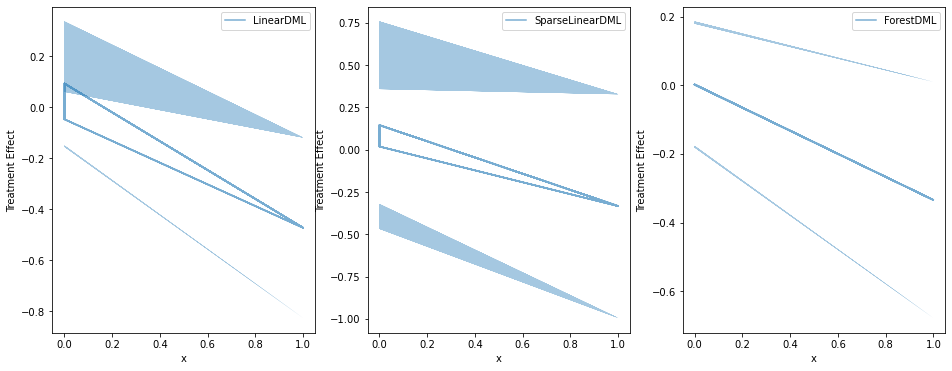

In [ ]:
#expected_te=np.array([exp_te(x_i) for x_i in X_test])
plt.figure(figsize=(16,6))
plt.subplot(1, 3, 1)
plt.plot( X_.values[:, 0], te_pred, label='LinearDML', alpha=.6)
plt.fill_between( X_.values[:, 0], lb, ub, alpha=.4)
#plt.plot(X_test[:, 0], expected_te, 'b--', label='True effect')
plt.ylabel('Treatment Effect')
plt.xlabel('x')
plt.legend()
plt.subplot(1, 3, 2)
plt.plot( X_.values[:, 0], te_pred2, label='SparseLinearDML', alpha=.6)
plt.fill_between( X_.values[:, 0], lb2, ub2, alpha=.4)
#plt.plot(X_test[:, 0], expected_te, 'b--', label='True effect')
plt.ylabel('Treatment Effect')
plt.xlabel('x')
plt.legend()
plt.subplot(1, 3, 3)
plt.plot( X_.values[:, 0], te_pred3, label='ForestDML', alpha=.6)
plt.fill_between( X_.values[:, 0], lb3, ub3, alpha=.4)
#plt.plot(X_test[:, 0], expected_te, 'b--', label='True effect')
plt.ylabel('Treatment Effect')
plt.xlabel('x')
plt.legend()
plt.show()

In [ ]:
est4 = ForestDRLearner(model_regression=model_y,
                      model_propensity=LogisticRegressionCV(),
                      cv=3,
                      n_estimators=4000,
                      min_samples_leaf=10,
                      verbose=0,
                      min_weight_fraction_leaf=.005)
est4.fit(yc_train, a_train, X=Xc_train)
te_pred4 = est4.effect(X_)
lb4, ub4 = est4.effect_interval(X_, alpha=0.05)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [ ]:
print(est4.score_)
print(est4.score(Y, a, X_))

1.0031590194826294
0.8343280361411155


In [ ]:
print(len(te_pred4[te_pred4>0])/len(te_pred4))
print(len(te_pred4[te_pred4<0])/len(te_pred4))

0.0
1.0





Propensity-score based approach with Causallib

In [ ]:
X_=X[['silc', 'gfv_cg', 'other_group_member']]
#X_=X.drop('ration_protection', axis=1)
a=X['voucher_agri']
y=Y['class']

In [ ]:
#indExclude = (X_['silc'] < 1) & (X_['gfv_cg'] > 0)
#indExclude_ = (X_['silc'] > 0) & (X_['other_group_member'] > 0)
#indExclude = (X_['silc_group_member'] > 0) & (X_['other_group_member'] < 1)

In [ ]:
#lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
gb_clf = GradientBoostingClassifier(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=3)
vot_clf = VotingClassifier(estimators=[('gb', gb_clf), ('dt', dt_clf)], voting='soft')
#lr = GradientBoostingClassifier()
#lr = vot_clf
#ipw = IPW(lr)
#ipw=Matching()
ipw=overlap_weights.OverlapWeights(lr)

In [ ]:
ipw.fit(X_, a)
#ipw.fit(X_, a, y)

OverlapWeights(clip_max=None, clip_min=False, use_stabilized=False, verbose=False,
               learner=LogisticRegression(max_iter=1000, penalty='l1', solver='saga'))

In [ ]:
#y = y.loc[~indExclude]
#y = y.loc[~indExclude_]
#a = a.loc[~indExclude]
#a = a.loc[~indExclude_]
#X_ = X_.loc[~indExclude]
#X_ = X_.loc[~indExclude_]
#print(y.mean())
#print(a.mean())

In [ ]:
outcomes = ipw.estimate_population_outcome(X_, a, y)
print(outcomes)

0    0.735219
1    0.509804
dtype: float64


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


{'train': {'weight_distribution': <matplotlib.axes._subplots.AxesSubplot at 0x7f45ec870dc0>,
  'pr_curve': <matplotlib.axes._subplots.AxesSubplot at 0x7f45edb0f340>,
  'roc_curve': <matplotlib.axes._subplots.AxesSubplot at 0x7f45edab96d0>,
  'covariate_balance_love': <matplotlib.axes._subplots.AxesSubplot at 0x7f45edae3a90>,
  'calibration': <matplotlib.axes._subplots.AxesSubplot at 0x7f45eda94610>,
  'covariate_balance_slope': <matplotlib.axes._subplots.AxesSubplot at 0x7f45eda39df0>}}

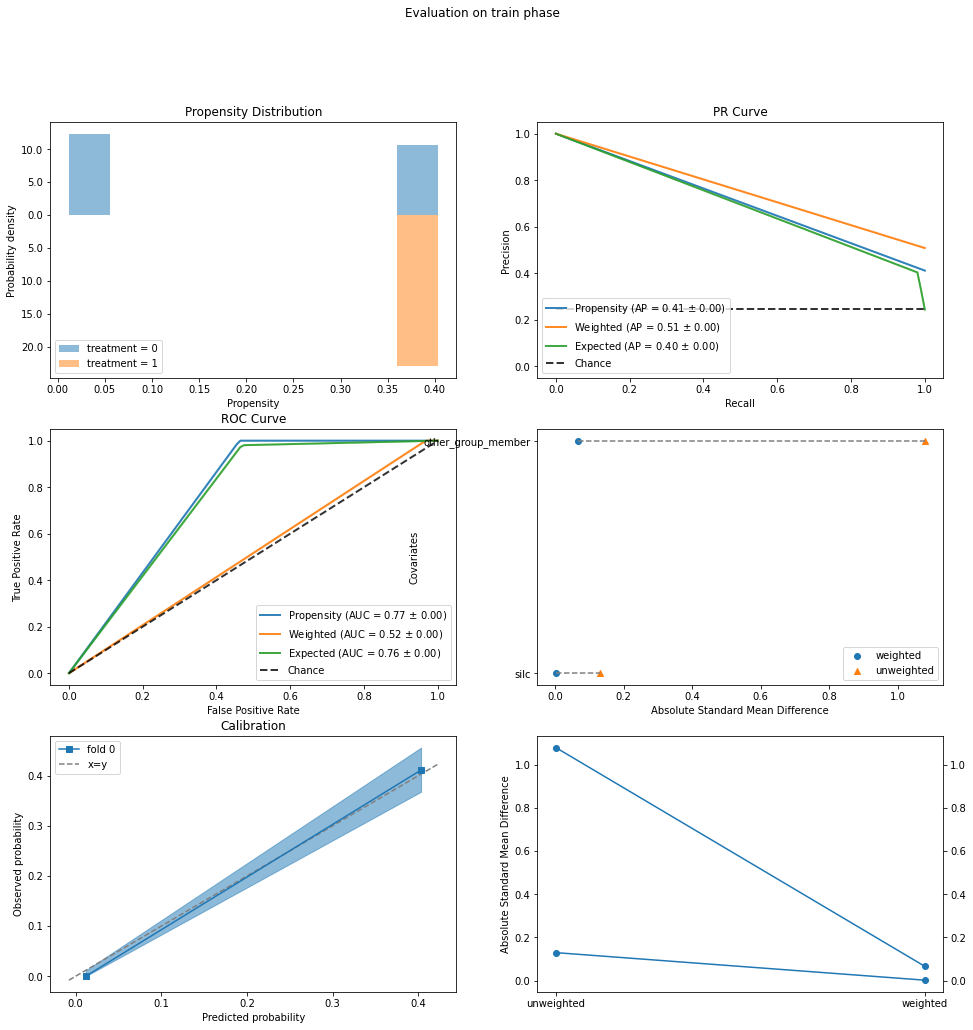

In [ ]:
eval_results = evaluate(ipw, X_, a, y)
eval_results.plot_all()
#eval_results.plot_covariate_balance(kind="love");

In [ ]:
ipw.estimate_effect(outcomes[1], outcomes[0], effect_types=['diff','ratio'])

diff     0.865360
ratio    2.618582
dtype: float64

From the IPW analysis (Inverse Probability of Treatment/intervention Weighting), We conclude that the food distribution during the lean season while other services are either provided or not results in a higher rate of using latrines, 97% to 100%, a difference of 3.0% and a relative increase of almost 3%.

Based on the diagnosis of the approach, there are no residual systematic differences in observed baseline characteristics between treated and control subjects in the sample weighted by the estimated inverse probability of treatment, which statistically validates the conclusions

In [ ]:
!pip install aix360
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
from aix360.algorithms.rbm import BooleanRuleCG, FeatureBinarizer
fb = FeatureBinarizer(negations=True)
X_fb = fb.fit_transform(X_)
br = BooleanRuleCG()
br.fit(X_fb, a)

from sklearn.metrics import accuracy_score, roc_auc_score
aPred = br.predict(X_fb)
print('Accuracy: {}'.format(accuracy_score(a, aPred)))
print('AUC: {}'.format(roc_auc_score(a, aPred)))
print(br.explain()['rules'])

In [ ]:
#gb = LinearRegression()
gb_clf = GradientBoostingClassifier(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=3)
vot_clf = VotingClassifier(estimators=[('gb', gb_clf), ('dt', dt_clf)], voting='soft')
std = Standardization(vot_clf, predict_proba=True)
std.fit(X_, a, y)

Standardization(encode_treatment=False, predict_proba=True,
                learner=VotingClassifier(estimators=[('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=42))],
                 voting='soft'))

In [ ]:
outcomes = std.estimate_population_outcome(X_, a).xs(1, level='y')
print(outcomes)
std.estimate_effect(outcomes[1], outcomes[0], effect_types=['diff','ratio'])

In [ ]:
eval_results = evaluate(std, X_, a, y)
eval_results.plot_all()

In [ ]:
std = StratifiedStandardization(vot_clf, predict_proba=True)
std.fit(X_, a, y)

outcomes = std.estimate_population_outcome(X_, a).xs(1, level='y')
print(outcomes)
std.estimate_effect(outcomes[0], outcomes[1], effect_types=['diff','ratio'])

ValueError: ignored

{'train': {'roc_curve': <matplotlib.axes._subplots.AxesSubplot at 0x7fb9d9b3f370>,
  'pr_curve': <matplotlib.axes._subplots.AxesSubplot at 0x7fb9d7997160>,
  'calibration': <matplotlib.axes._subplots.AxesSubplot at 0x7fb9d5f4fc70>}}

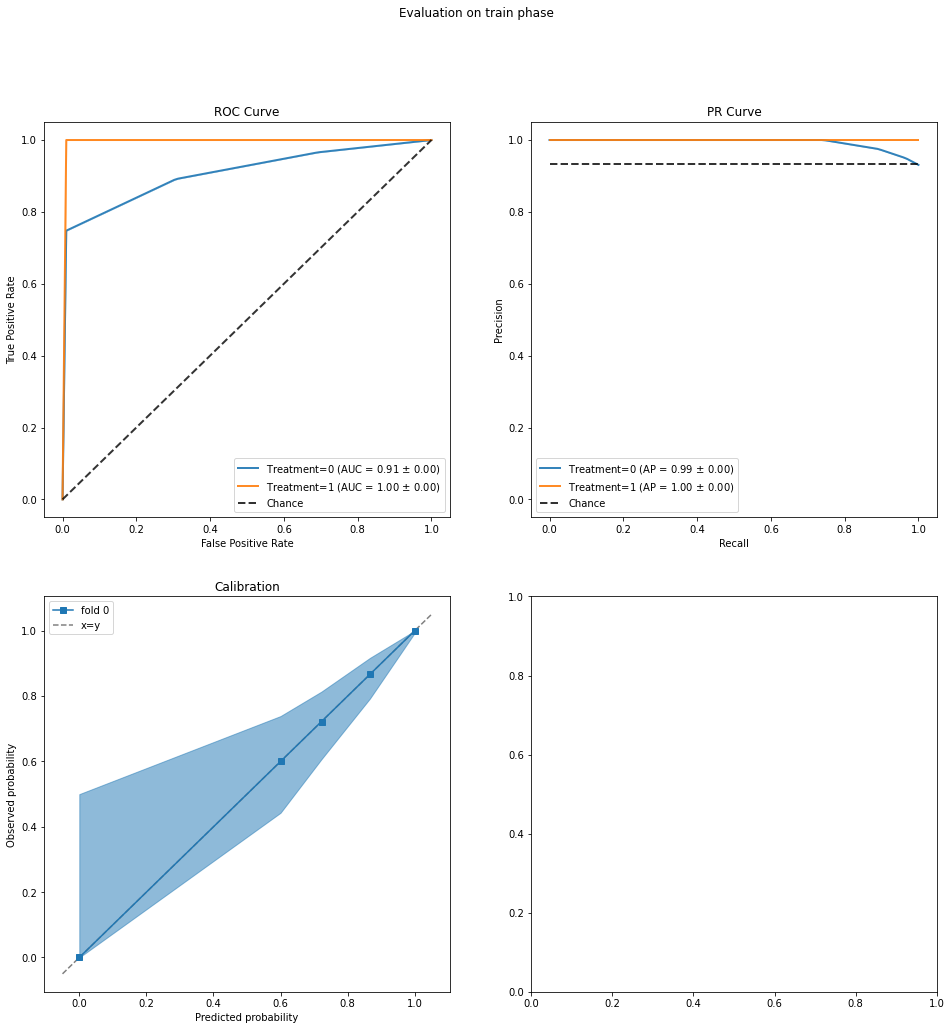

In [ ]:
eval_results = evaluate(std, X_, a, y)
eval_results.plot_all()

Uncertainty Quantification:

https://github.com/SpikeLab-CL/cpadapter/blob/main/examples/cpadapter_example.ipynb https://github.com/donlnz/nonconformist/blob/master/README.ipynb

In [ ]:
#!pip install cpadapter
!pip install nonconformist
#import cpadapter
#from cpadapter.performance_measures import right_guess, width, uncertainty
#from cpadapter.visualization import plot_class_interval, class_histogram, confusion_matrix
from nonconformist.cp import IcpClassifier
from nonconformist.nc import NcFactory

CP with cpadapter

In [ ]:
#from cpadapter.utils import train_cal_test_split

In [ ]:
gb_clf = GradientBoostingClassifier(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=3)
vot_clf = VotingClassifier(estimators=[('gb', gb_clf), ('dt', dt_clf)], voting='soft')

In [ ]:
cp_model = cpadapter.Adapt_to_CP(gb_clf, True)

In [ ]:
cp_model.fit(X_train.values, y_train.values.ravel())
cp_model.calibrate(X_cal.values, y_cal.values)

confidence = 0.90
prediction = cp_model.predict(X_test.values, confidence)

In [ ]:
interval = prediction[0]
pred_class = prediction[1]

In [ ]:
coverage = right_guess(y_test, interval)
uncertain_cases = uncertainty(interval)
norm_width = width(interval)

print('Interval coverage: ', coverage)
print('Interval normalized width: ', norm_width)
print('Percentage of uncertain predicted intervals: ', uncertain_cases)

Interval coverage:  18.142857142857142
Interval normalized width:  0.47619047619047616
Percentage of uncertain predicted intervals:  0.0


/usr/local/lib/python3.8/dist-packages/cpadapter/visualization.py:196: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pred_classes = np.array(classes_in_interval(preds))


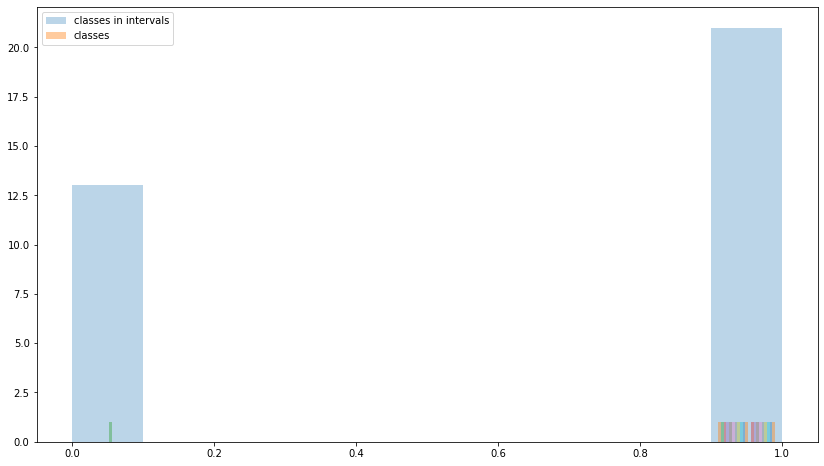

In [ ]:
#plot_class_interval(y_test, interval)
class_histogram(y_test, interval)

Inductive CP with nonconformist

In [ ]:
gb_clf = GradientBoostingClassifier(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=3)
vot_clf = VotingClassifier(estimators=[('gb', gb_clf), ('dt', dt_clf)], voting='soft')

In [ ]:
nc = NcFactory.create_nc(vot_clf)	# Create a default nonconformity function
icp = IcpClassifier(nc)

In [ ]:
# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values.ravel())

# Calibrate the ICP using the calibration set
icp.calibrate(X_cal.values, y_cal.values.ravel())

# Produce predictions for the test set, with confidence 95%
prediction = icp.predict(X_test.values, significance=0.05)

# Print the first 5 predictions
print(prediction[:5, :])

[[False  True]
 [ True False]
 [ True False]
 [ True False]
 [False  True]]


In [ ]:
prediction = icp.predict(data_.drop('preds', axis=1).values, significance=0.05)

In [ ]:
prediction

array([[ True, False],
       [ True, False],
       [ True, False],
       ...,
       [ True, False],
       [ True, False],
       [ True, False]])

In [ ]:
prediction[:,0]

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
data_['95% IC0']=prediction[:,0]
data_['95% IC1']=prediction[:,1]

In [ ]:
data['preds']=data_['preds']
data['95% IC0']=data_['95% IC0']
data['95% IC1']=data_['95% IC1']

In [ ]:
data.to_csv('Prediction.csv', index=False)

CP withMapie

https://github.com/scikit-learn-contrib/MAPIE/blob/master/notebooks/classification/Cifar10.ipynb

https://github.com/PacktPublishing/Practical-Guide-to-Applied-Conformal-Prediction

https://github.com/ptocca/VennABERS

https://mapie.readthedocs.io/en/latest/examples_regression/4-tutorials/plot_ts-tutorial.html

https://github.com/MLWorkshops/MAPIEwalkthrough/blob/main/conformalPrediction.ipynb

In [ ]:
!pip install mapie

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mapie.metrics import classification_coverage_score
from mapie.classification import MapieClassifier

In [ ]:
method_params = {
    "naive": ("naive", False),
    "score": ("score", False),
    "cumulated_score": ("cumulated_score", True),
    "random_cumulated_score": ("cumulated_score", "randomized"),
    "top_k": ("top_k", False)
}

In [ ]:
y_preds, y_pss = {}, {}
alphas = np.arange(0.02, 0.99, 0.01)
#samples=np.arange(0.01,0.57,0.01)
for name, (method, include_last_label) in method_params.items():
  mapie = MapieClassifier(estimator=vot_clf, method=method, random_state=123)
  mapie.fit(X_cal.values, y_cal.values.ravel())
  y_preds[name], y_pss[name] = mapie.predict(X_test, alpha=alphas, include_last_label=include_last_label)

In [ ]:
def count_null_set(y: np.ndarray) -> int:
    """
    Count the number of empty prediction sets.

    Parameters
    ----------
    y: np.ndarray of shape (n_sample, )

    Returns
    -------
    int
    """
    count = 0
    for pred in y[:, :]:
        if np.sum(pred) == 0:
            count += 1
    return count

In [ ]:
#y_test_=y_test.replace(['Poor', 'Borderline', 'Acceptable'], [0,1,2])

In [ ]:
nulls, coverages, accuracies, sizes = {}, {}, {}, {}
for name, (method, include_last_label) in method_params.items():
    accuracies[name] = accuracy_score(y_test, y_preds[name])
    nulls[name] = [
        count_null_set(y_pss[name][:, :, i])  for i, _ in enumerate(alphas)
    ]
    coverages[name] = [
        classification_coverage_score(
            y_test, y_pss[name][:, :, i]
        ) for i, _ in enumerate(alphas)
    ]
    sizes[name] = [
        y_pss[name][:, :, i].sum(axis=1).mean() for i, _ in enumerate(alphas)
    ]

In [ ]:
coverage_90 = {method: coverage[8] for method, coverage in coverages.items()}
null_90 = {method: null[8] for method, null in nulls.items()}
width_90 = {method: width[8] for method, width in sizes.items()}
y_ps_90 = {method: y_ps[:, :, 8] for method, y_ps in y_pss.items()}

In [ ]:
summary_df = pd.concat(
    [
        pd.Series(coverage_90),
        pd.Series(null_90),
        pd.Series(width_90)
    ],
    axis=1,
    keys=["Coverages", "Number of null sets", "Average prediction set sizes"]
).round(3)

In [ ]:
summary_df

,Coverages,Number of null sets,Average prediction set sizes
naive,0.736,0,1.582
score,0.958,0,2.439
cumulated_score,1.000,0,3.000
random_cumulated_score,0.958,0,2.619
top_k,1.000,0,3.000


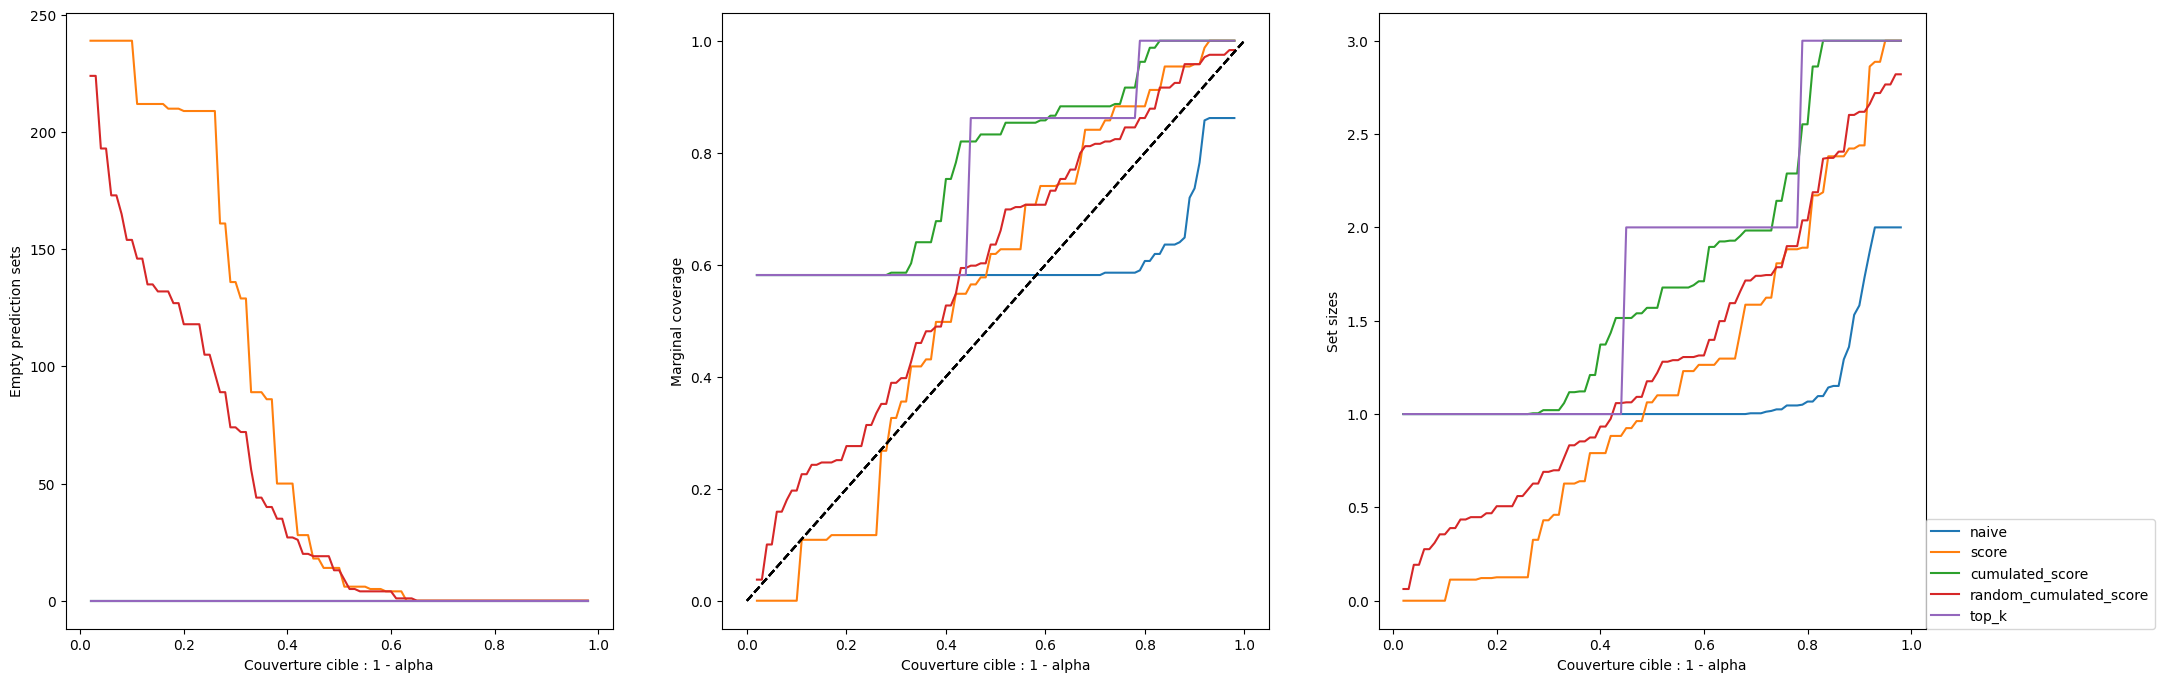

In [ ]:
vars_y = [nulls, coverages, sizes]
labels_y = ["Empty prediction sets", "Marginal coverage", "Set sizes"]
fig, axs = plt.subplots(1, len(vars_y), figsize=(8*len(vars_y), 8))
for i, var in enumerate(vars_y):
    for name, (method, include_last_label) in method_params.items():
        axs[i].plot(1 - alphas, var[name], label=name)
        if i == 1:
            axs[i].plot([0, 1], [0, 1], ls="--", color="k")
    axs[i].set_xlabel("Couverture cible : 1 - alpha")
    axs[i].set_ylabel(labels_y[i])
    if i == len(vars_y) - 1:
        axs[i].legend(fontsize=10, loc=[1, 0])

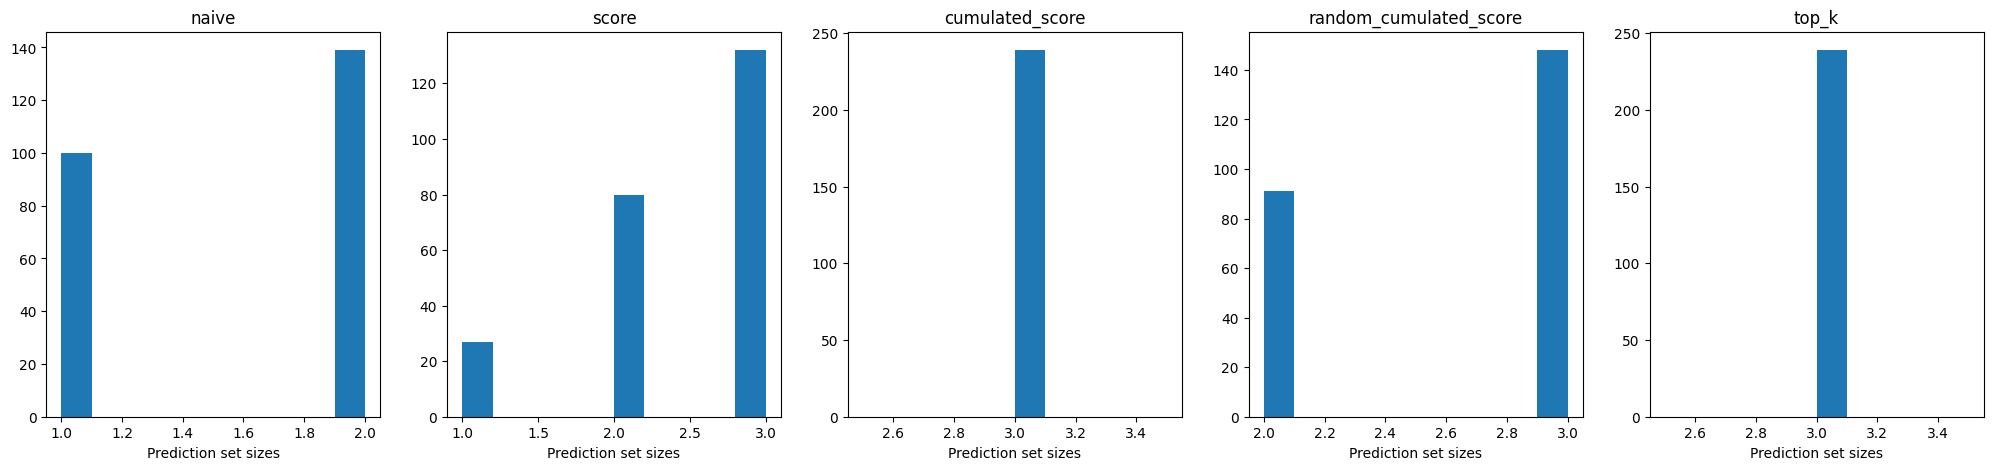

In [ ]:
s=5
fig, axs = plt.subplots(1, len(y_preds), figsize=(s*len(y_preds), s))
for i, (method, y_ps) in enumerate(y_ps_90.items()):
    sizes = y_ps.sum(axis=1)
    axs[i].hist(sizes)
    axs[i].set_xlabel("Prediction set sizes")
    axs[i].set_title(method)

In [ ]:
def get_class_coverage(
    y_test: np.ndarray,
    y_method: Dict[str, np.ndarray],
    label_names: List[str]
) -> None:
    """
    Compute the coverage for each class. As MAPIE is looking for a
    global coverage of 1-alpha, it is important to check that their
    is not major coverage difference between classes.

    Parameters
    ----------
    y_test: np.ndarray of shape (n_samples,)
        Labels of the predictions.

    y_method: Dict[str, np.ndarray]
        Prediction sets for each method.

    label_names: List[str]
        Names of the labels.
    """
    recap ={}
    for method in y_method:
        recap[method] = []
        for label in sorted(np.unique(y_test)):
            indices = np.where(y_test==label)[0]
            label_name = label_names[label]
            y_test_trunc = y_test.iloc[indices]
            y_set_trunc = y_method[method][indices]
            score_coverage = classification_coverage_score(y_test_trunc, y_set_trunc)
            recap[method].append(score_coverage)
    recap_df = pd.DataFrame(recap, index = label_names)
    return recap_df


In [ ]:
label_names=['Poor', 'Borderline', 'Acceptable']

In [ ]:
class_coverage = get_class_coverage(y_test.reset_index().drop('index', axis=1), y_ps_90, label_names)


<Figure size 640x480 with 0 Axes>

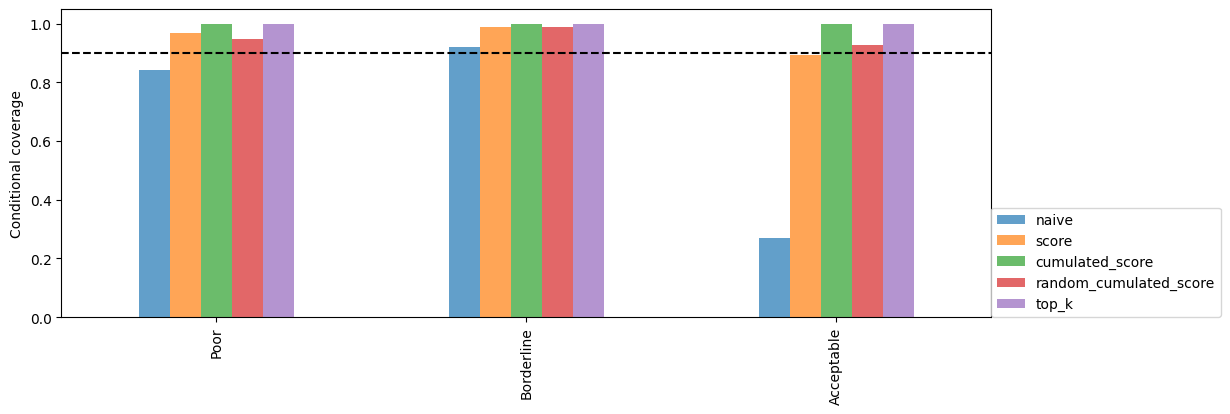

In [ ]:
fig = plt.figure()
class_coverage.plot.bar(figsize=(12, 4), alpha=0.7)
plt.axhline(0.9, ls="--", color="k")
plt.ylabel("Conditional coverage")
plt.legend(loc=[1, 0])

In [ ]:
mapie = MapieClassifier(estimator=vot_clf, method='score', cv="prefit", random_state=123)
mapie.fit(X_cal.values, y_cal.values.ravel())
y_preds, y_pss = mapie.predict(data_.drop('preds', axis=1), alpha=0.1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
data_['90% IC0']=y_pss[:,0]
data_['90% IC1']=y_pss[:,1]
data_['90% IC2']=y_pss[:,2]

In [ ]:
data5['preds']=data_['preds']
data5['90% IC0']=data_['90% IC0']
data5['90% IC1']=data_['90% IC1']
data5['90% IC2']=data_['90% IC2']

In [ ]:
data5['preds_label']=data5['preds'].replace([0,1,2], ['Poor', 'Borderline', 'Acceptable'])
data5.to_csv('predictions_FCS.csv', index=False)

In [ ]:
data5

,district,commune,fokontany,code_menage,type_individus,sexe,age,SILC,groupe_elevage,groupe_agriculture,...,voucher_peche,voucher_agri,dist_GFD,dist_ration_protection,dist_1000Jours,preds,90% IC0,90% IC1,90% IC2,preds_label
0,120-AMPANIHY-OUEST,507230-ANDROKA,507230021-LAHITSITELE,101-507230021-4DOP,chef_menage,1,80.0,0,0,0,...,0,0,1,0,0,2,False,True,True,Acceptable
1,120-AMPANIHY-OUEST,507230-ANDROKA,507230021-LAHITSITELE,101-507230021-5F1C,chef_menage,1,18.0,0,0,0,...,0,0,1,0,0,2,False,True,True,Acceptable
2,120-AMPANIHY-OUEST,507230-ANDROKA,507230021-LAHITSITELE,101-507230021-5ZWQ,chef_menage,0,48.0,0,0,0,...,0,0,0,1,0,1,False,True,False,Borderline
3,120-AMPANIHY-OUEST,507230-ANDROKA,507230021-LAHITSITELE,101-507230021-6LIF,chef_menage,0,49.0,0,0,0,...,0,0,1,0,0,2,False,True,True,Acceptable
4,120-AMPANIHY-OUEST,507230-ANDROKA,507230021-LAHITSITELE,101-507230021-BN3Z,chef_menage,0,22.0,0,0,0,...,0,0,0,1,1,1,True,True,False,Borderline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80851,211-TSIHOMBE,514074-ANKILIVALO,514074825-TSIBOANTSOA-II,fg_nut_144_crs_514074825-5G5G,chef_menage,1,41.0,0,0,0,...,0,0,0,1,0,1,False,True,False,Borderline
80852,211-TSIHOMBE,514074-ANKILIVALO,514011002-AMBATOMANOY,fg_nut_98_crs_514011002-LW8R,chef_menage,1,23.0,0,0,0,...,0,0,0,1,0,1,False,True,False,Borderline
80853,211-TSIHOMBE,514074-ANKILIVALO,514011007-BEFOTAKE-CENTRE,fg_nut_98_crs_514011007-ZPLJ,chef_menage,1,23.0,0,0,0,...,0,0,0,1,0,1,False,True,False,Borderline
80854,211-TSIHOMBE,514074-ANKILIVALO,514011014-NAMOTAHA-I,fg_nut_98_crs_514011014-1UAQ,chef_menage,1,39.0,0,0,0,...,0,0,0,1,0,1,False,True,False,Borderline
